### Using dataset "Equities" and the iterative nmf algorithm to analyse a large **FTSE100** dataset

In [35]:
#Dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from NMF import nonNegMatrixFac
import numpy as np
from collections import Counter

**Convert the CSV dataset into a numpy matrix**

In [24]:
dataset = pd.read_excel('../Datasets/Equities.xlsx')
dataset

,Name,FTSE100,ADMIRAL GROUP,ANGLO AMERICAN,ANTOFAGASTA,ASHTEAD GROUP,ASSOCIATED BRIT.FOODS,ASTRAZENECA,AVIVA,BAE SYSTEMS,...,STANDARD LIFE ABERDEEN,TAYLOR WIMPEY,TESCO,UNILEVER (UK),UNITED UTILITIES GROUP,VODAFONE GROUP,WHITBREAD,WOOD GROUP (JOHN),WPP,3I GROUP
0,2011-08-18,5092.23,1492.0,2299.0,1170.0,103.1,1035,2743.5,322.0,253.8,...,195.28,29.00,371.55,2025.0,580.0,166.50,1445,526.5,601.0,204.3
1,2011-08-19,5040.76,1495.0,2238.5,1183.0,101.0,1020,2731.5,315.3,253.5,...,194.77,28.71,370.25,2007.0,571.5,163.93,1429,507.5,590.0,202.0
2,2011-08-22,5095.30,1521.0,2249.5,1212.0,100.6,1041,2822.0,318.0,258.1,...,198.64,28.90,377.70,2038.0,580.5,167.06,1454,518.5,578.5,203.4
3,2011-08-23,5129.42,1535.0,2234.0,1206.0,99.4,1049,2832.5,318.8,258.8,...,197.93,29.10,377.20,2042.0,579.5,168.75,1445,542.5,580.0,200.7
4,2011-08-24,5205.85,1353.0,2287.0,1203.0,101.0,1049,2873.5,327.4,266.9,...,203.64,29.52,377.30,2043.0,586.5,172.18,1441,554.5,623.0,207.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,2019-02-22,7178.60,2185.0,2057.0,946.0,2057.0,2313,6159.0,425.7,470.8,...,235.60,167.55,222.80,4190.0,852.8,141.80,4894,532.4,845.0,953.0
1962,2019-02-25,7183.74,2187.0,2039.0,966.2,2058.0,2273,6290.0,428.8,475.9,...,239.55,165.35,223.40,4156.5,850.8,139.60,4901,528.6,855.0,955.8
1963,2019-02-26,7151.12,2182.0,2051.5,968.8,2034.0,2319,6271.0,430.0,472.6,...,242.50,170.95,228.40,4117.0,850.0,136.60,4910,545.0,842.8,958.0
1964,2019-02-27,7107.20,2169.0,2030.0,964.4,1995.0,2255,6283.0,423.4,469.7,...,242.20,177.00,229.10,3988.0,839.2,133.60,4854,538.8,832.6,935.4


In [25]:
dataset = dataset.drop(['FTSE100','Name'], axis=1)
feature_names = dataset.columns.tolist()
dataset

,ADMIRAL GROUP,ANGLO AMERICAN,ANTOFAGASTA,ASHTEAD GROUP,ASSOCIATED BRIT.FOODS,ASTRAZENECA,AVIVA,BAE SYSTEMS,BARCLAYS,BARRATT DEVELOPMENTS,...,STANDARD LIFE ABERDEEN,TAYLOR WIMPEY,TESCO,UNILEVER (UK),UNITED UTILITIES GROUP,VODAFONE GROUP,WHITBREAD,WOOD GROUP (JOHN),WPP,3I GROUP
0,1492.0,2299.0,1170.0,103.1,1035,2743.5,322.0,253.8,142.26,70.85,...,195.28,29.00,371.55,2025.0,580.0,166.50,1445,526.5,601.0,204.3
1,1495.0,2238.5,1183.0,101.0,1020,2731.5,315.3,253.5,139.02,67.50,...,194.77,28.71,370.25,2007.0,571.5,163.93,1429,507.5,590.0,202.0
2,1521.0,2249.5,1212.0,100.6,1041,2822.0,318.0,258.1,135.10,68.60,...,198.64,28.90,377.70,2038.0,580.5,167.06,1454,518.5,578.5,203.4
3,1535.0,2234.0,1206.0,99.4,1049,2832.5,318.8,258.8,134.36,71.20,...,197.93,29.10,377.20,2042.0,579.5,168.75,1445,542.5,580.0,200.7
4,1353.0,2287.0,1203.0,101.0,1049,2873.5,327.4,266.9,138.19,71.05,...,203.64,29.52,377.30,2043.0,586.5,172.18,1441,554.5,623.0,207.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,2185.0,2057.0,946.0,2057.0,2313,6159.0,425.7,470.8,156.14,575.20,...,235.60,167.55,222.80,4190.0,852.8,141.80,4894,532.4,845.0,953.0
1962,2187.0,2039.0,966.2,2058.0,2273,6290.0,428.8,475.9,159.22,573.20,...,239.55,165.35,223.40,4156.5,850.8,139.60,4901,528.6,855.0,955.8
1963,2182.0,2051.5,968.8,2034.0,2319,6271.0,430.0,472.6,164.90,589.20,...,242.50,170.95,228.40,4117.0,850.0,136.60,4910,545.0,842.8,958.0
1964,2169.0,2030.0,964.4,1995.0,2255,6283.0,423.4,469.7,166.90,599.20,...,242.20,177.00,229.10,3988.0,839.2,133.60,4854,538.8,832.6,935.4


In [26]:
dataset = dataset.to_numpy()

In [ ]:
# Apply NMF to reduce the dimentionality

m, n = dataset.shape
print(dataset.shape)
r = 10

W = np.random.rand(m,r)
H = np.random.rand(r,n)

V_norm = np.zeros((m,n))

for i in range(n):
    V_norm[:,i] = dataset[:,i] / np.max(dataset[:,i])

mnf = nonNegMatrixFac(W, H, 30000)
mnf.fit(V_norm)

(1966, 95)


(array([[2.08971375e-01, 1.53636757e-01, 2.83896240e-02, ...,
         1.25169580e-01, 3.21010152e-01, 1.36421481e-02],
        [1.57684709e-01, 1.62926992e-01, 2.78260759e-21, ...,
         8.14214793e-02, 3.51613473e-01, 4.22679121e-10],
        [1.55563034e-01, 1.39795211e-01, 3.42016569e-63, ...,
         5.45409271e-02, 3.61451673e-01, 8.23304667e-07],
        ...,
        [3.32175121e-02, 3.77155779e-19, 1.58329090e-01, ...,
         1.16514013e+00, 5.74454647e-01, 2.73684041e+00],
        [2.86294284e-02, 8.03203855e-12, 1.58237633e-01, ...,
         1.13240198e+00, 5.90378780e-01, 2.71211911e+00],
        [2.68271915e-03, 2.16204251e-28, 1.44196504e-01, ...,
         1.16192130e+00, 6.26309580e-01, 2.73232316e+00]]),
 array([[1.26959692e-001, 1.77023777e-001, 6.51309579e-002,
         5.54849649e-016, 1.49878794e-001, 1.00128748e-001,
         1.78197980e-001, 9.49308042e-002, 4.60273910e-002,
         3.15002282e-003, 6.89239355e-002, 1.96497779e-001,
         2.03139446e-001,

In [ ]:
H_df = pd.DataFrame(mnf.H, columns=feature_names)
H_df

,ADMIRAL GROUP,ANGLO AMERICAN,ANTOFAGASTA,ASHTEAD GROUP,ASSOCIATED BRIT.FOODS,ASTRAZENECA,AVIVA,BAE SYSTEMS,BARCLAYS,BARRATT DEVELOPMENTS,...,STANDARD LIFE ABERDEEN,TAYLOR WIMPEY,TESCO,UNILEVER (UK),UNITED UTILITIES GROUP,VODAFONE GROUP,WHITBREAD,WOOD GROUP (JOHN),WPP,3I GROUP
0,1.269597e-01,1.770238e-01,6.513096e-02,5.548496e-16,0.149879,0.100129,0.178198,0.094931,4.602739e-02,3.150023e-03,...,0.044281,0.006909,2.928610e-01,0.055078,0.052697,0.270607,0.076171,7.860640e-02,0.133228,0.052651
1,1.162432e-01,2.331036e-11,1.069586e-01,1.355991e-02,0.067181,0.077908,0.017540,0.100782,2.918275e-01,1.011207e-01,...,0.215345,0.079429,1.880030e-01,0.162360,0.152740,0.095935,0.110583,3.123688e-01,0.113917,0.044279
2,8.965503e-17,7.111645e-33,1.313847e-01,1.966693e-01,0.138419,0.053731,0.260207,0.208192,3.456217e-01,2.412749e-01,...,0.281416,0.286807,3.123026e-02,0.027877,0.120522,0.121978,0.196515,1.482606e-01,0.199454,0.088715
3,1.729471e-01,1.418286e-02,1.068238e-01,2.416501e-01,0.086222,0.122142,0.161753,0.271438,2.118310e-01,2.273431e-01,...,0.190464,0.259841,1.853583e-02,0.224543,0.158639,0.107067,0.116864,2.028162e-01,0.253717,0.271666
4,1.380869e-01,3.433621e-01,3.570579e-01,7.694363e-148,0.048207,0.129756,0.178293,0.123762,1.799596e-01,1.389205e-24,...,0.110050,0.021584,3.229546e-01,0.129392,0.181078,0.216058,0.063597,2.331647e-01,0.092833,0.034580
5,7.941783e-02,2.544415e-01,2.339306e-01,1.304825e-01,0.201488,0.152803,0.240404,0.077056,6.772359e-11,1.716912e-03,...,0.143699,0.009230,6.075497e-02,0.078417,0.112858,0.171305,0.077221,9.523381e-02,0.029900,0.071084
6,2.099330e-01,3.483012e-02,5.451073e-35,4.640316e-02,0.176255,0.172697,0.135143,0.136028,1.271167e-04,3.674198e-02,...,0.046836,0.061208,5.135591e-02,0.107013,0.243324,0.179142,0.135947,1.974441e-01,0.215114,0.005249
7,1.678200e-01,4.785379e-02,1.615256e-02,4.584656e-02,0.195977,0.227999,0.163674,0.112107,8.792313e-02,1.599996e-01,...,0.137298,0.104371,1.075157e-17,0.162374,0.265178,0.133794,0.285928,9.133904e-02,0.128964,0.101140
8,1.968317e-01,5.991507e-49,3.897666e-02,1.030651e-03,0.241668,0.113079,0.107886,0.077379,5.807380e-02,2.578964e-01,...,0.136672,0.253373,1.320034e-01,0.177700,0.133933,0.230655,0.129054,1.377658e-13,0.070989,0.138991
9,1.673035e-01,1.304421e-01,1.121241e-01,2.024606e-01,0.060699,0.177504,0.085694,0.131054,4.873519e-02,1.094045e-01,...,0.035148,0.114777,1.051519e-01,0.184137,0.064574,0.045753,0.126434,9.129671e-02,0.013230,0.186799


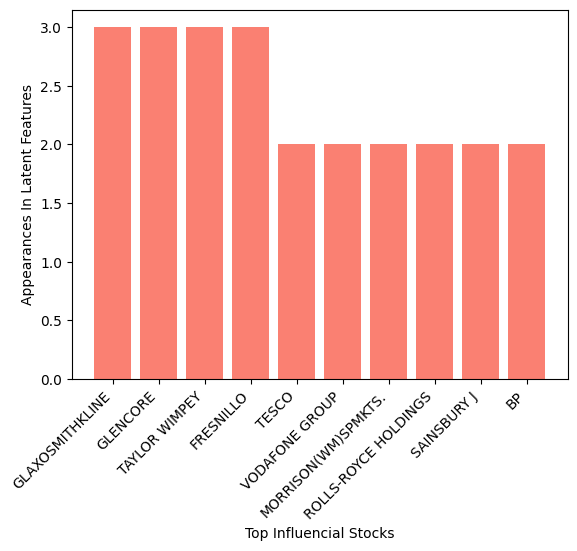

In [ ]:
# Extract most influencial stock market companies from the latent features.
top_features = {}

for i in range(H_df.shape[0]):
    component = H_df.iloc[i]
    top_indices = component.nlargest(10).index
    top_features[f'Latent Feature {i+1}'] = top_indices.tolist()

stock_counter = Counter()
for latent_feature, stocks in (top_features.items()):
    stock_counter = stock_counter + Counter(stocks)

histogram_data = {}
for stock, count in stock_counter.most_common(10):
    histogram_data[stock] = count

plt.bar(histogram_data.keys(), histogram_data.values(), color="salmon")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Top Influencial Stocks")
plt.ylabel("Appearances In Latent Features")
plt.show()